In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('./creditcard-data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display a concise summary of the DataFrame df, including column names, non-null counts...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())

Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0:  284315
Number Of Records With The Class Value 1:  492


<Axes: xlabel='Class', ylabel='count'>

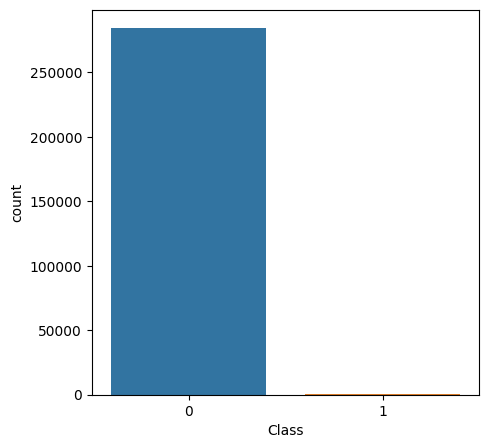

In [6]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the DataFrame df
plt.figure(figsize=(5, 5))
sns.countplot(x='Class', data=df)

Credit card fraud datasets, including this one, are typically highly imbalanced because occurrences of fraud are rare compared to normal transactions.

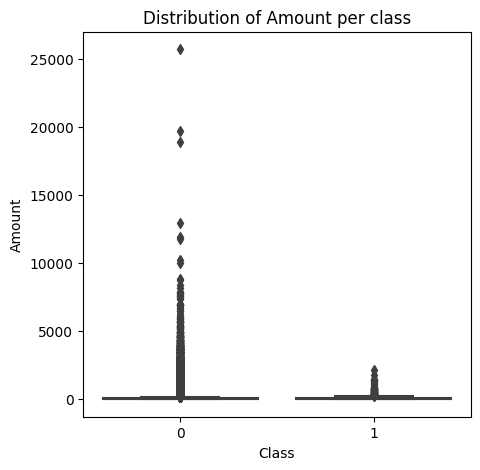

In [7]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Class', y='Amount', palette='tab10')

# Add titles and labels
plt.title('Distribution of Amount per class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

In [8]:
stats_amount = df.groupby('Class')['Amount'].agg(['mean', 'median', 'std'])
stats_amount

,mean,median,std
Class,,,
0,88.291022,22.00,250.105092
1,122.211321,9.25,256.683288


We observed that the values of non-fraudulent transactions were much more spread out, and there was positive skewness.

The distribution is skewed to the left of the median. We can observe that 80% of the amounts are between 0 and 100 euros. This can be explained by the fact that, on a daily basis, a person may make large expenses of several thousand euros, but most will be relatively small expenses. The mean, which is 80 euros, is therefore higher than the median, which is 22 euros for this class.

Regarding fraudulent transactions, the median is lower and the values are much less spread out. Indeed, during a fraudulent operation, to minimize suspicion, the amounts should not be too high. It is more advantageous, in this context, to make several small fraudulent transactions with low amounts rather than a large transaction that will not go unnoticed. This would explain the low value of the median for these data.


In [9]:
# Calculate the quartiles for the 'Amount' variable
quartiles = df['Amount'].quantile([0.25, 0.5, 0.75, 0.80, 0.90, 0.95])

# Print the results
print("Quartiles for 'Amount':")
print(quartiles)

Quartiles for 'Amount':
0.25      5.600
0.50     22.000
0.75     77.165
0.80    100.000
0.90    203.000
0.95    365.000
Name: Amount, dtype: float64


#### Daily transaction density

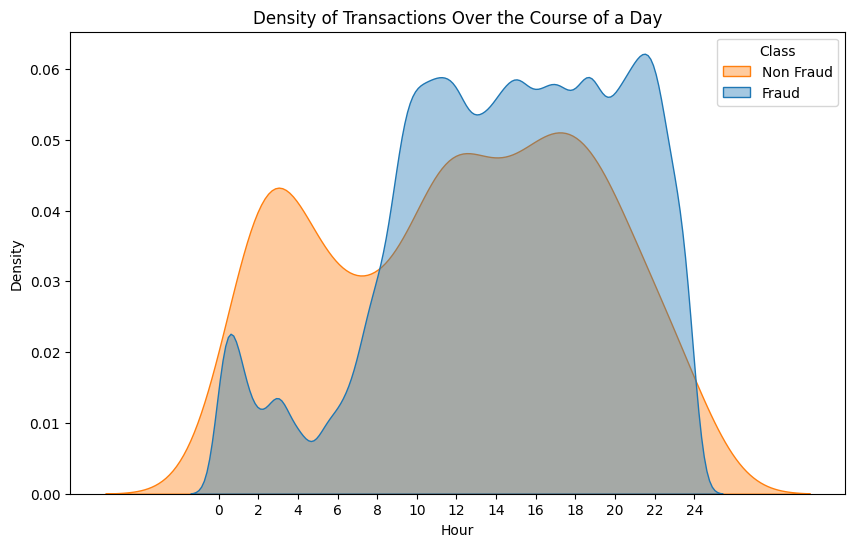

In [24]:
# Convert Time to hours and reduce to modulo 24
df2 = df.copy()
df2['Hour'] = (df['Time'] / 3600) % 24

# Plot density of transactions over the course of a day
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df2, x='Hour', hue='Class', fill=True, common_norm=False, alpha=0.4, palette='tab10')

# Customize the plot
plt.title('Density of Transactions Over the Course of a Day')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.xticks(ticks=range(0, 25, 2))
plt.legend(title='Class', labels=['Non Fraud', 'Fraud'])

# Show the plot
plt.show()

Next, we wanted to observe the density of transactions over the course of a day.

We observe that legitimate transactions mostly occur between 8 AM and 9 PM, which is normal as people are generally awake during this period of the day. However, there is a peak at 3 AM for fraudulent transactions with a higher density than normal transactions.

Therefore, it will be important to pay closer attention to transactions made at unusual hours.


#### Calculate correlation matrix

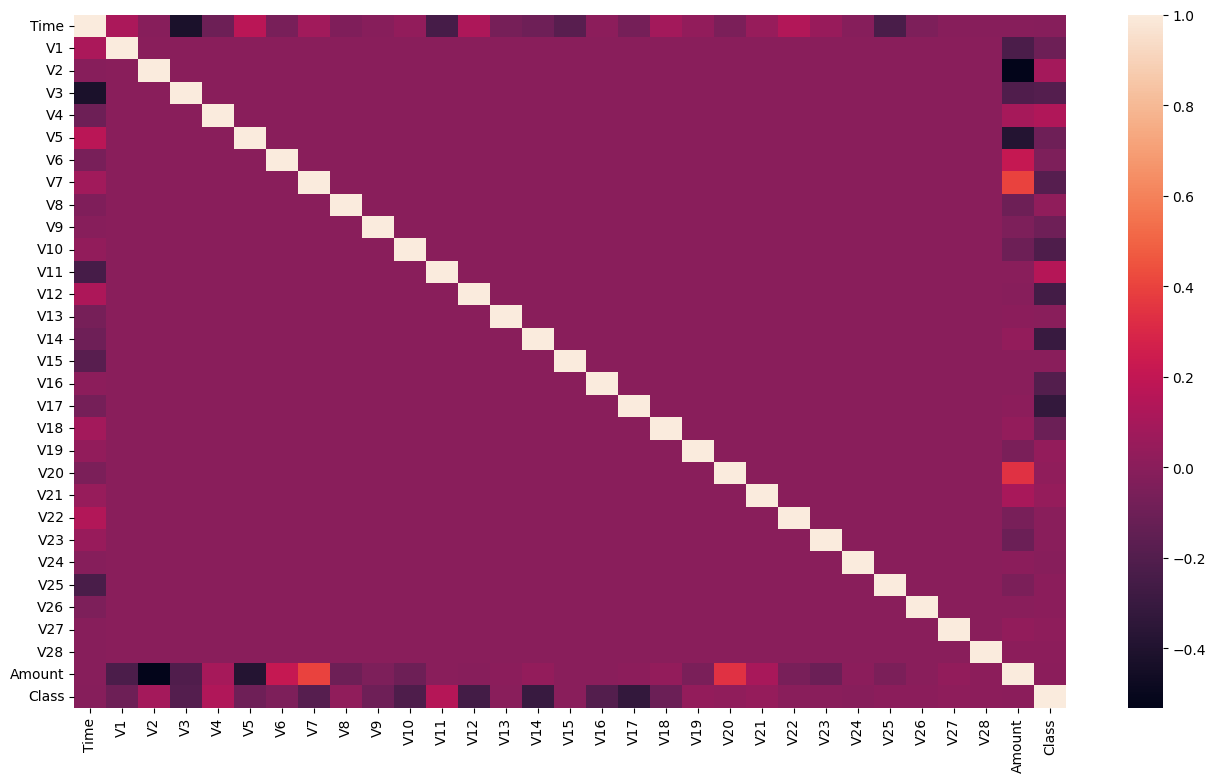

In [11]:
corr_matrix = df.iloc[:,:-1].corr()

# Plot correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=False, cbar=True)
plt.show()

The correlation between variables V1 to V28 is null, which is normal since these variables come from PCA (Principal Component Analysis), and the principal components are therefore uncorrelated.

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = df.drop(columns=['Class'])
y = df['Class']

# Show the original class distribution
print('Original class distribution:', Counter(y))

# We reduce class 0 to 10% of its original size.
undersample = RandomUnderSampler(sampling_strategy={0: int(len(y[y == 0]) * 0.1), 1: len(y[y == 1])})

# Apply the undersampler to the data
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Show the new class distribution
print('Resampled class distribution:', Counter(y_resampled))

Original class distribution: Counter({0: 284315, 1: 492})
Resampled class distribution: Counter({0: 28431, 1: 492})


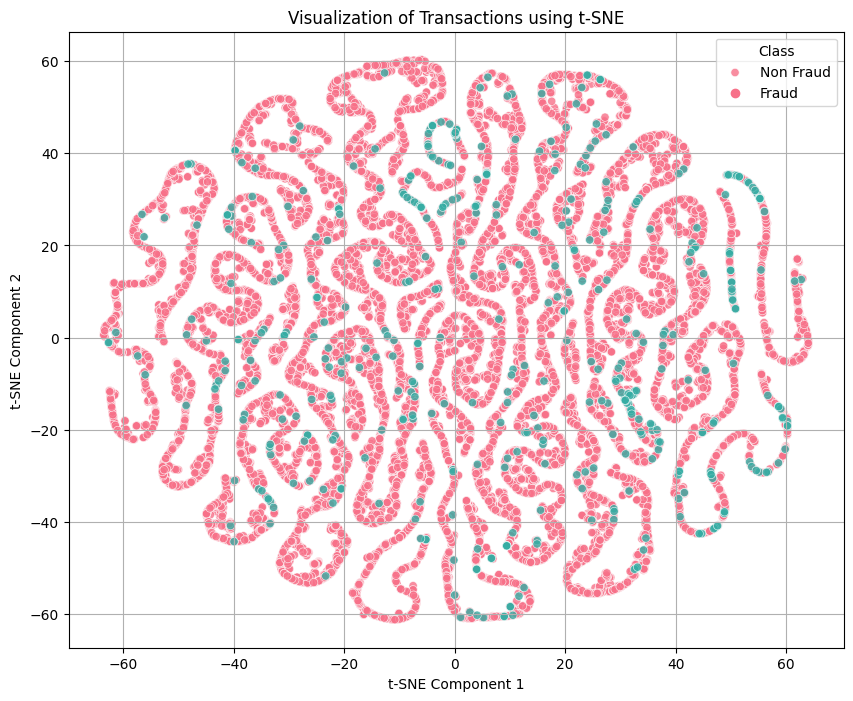

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, n_iter=500, random_state=0)
tsne_results = tsne.fit_transform(X_resampled)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y_resampled,
                palette=sns.color_palette('husl', 2), alpha=0.8)
plt.title('Visualization of Transactions using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class', labels=['Non Fraud', 'Fraud'])
plt.grid(True)
plt.show()


#### Feature Selection

Test ANOVA : 

*Interpret the Results* : F-scores indicate the variance between groups relative to the variance within groups. P-values indicate if this variance is significant.

- High F-score: Indicates a strong relationship between the feature and the target variable.
- Low p-value (typically < 0.05): Indicates that the relationship is statistically significant.

*Select Features* : Choose features with the highest F-scores and the lowest p-values.

In [28]:
from sklearn.feature_selection import f_classif

X = df.drop(columns=['Class'])
y = df['Class']

# Calculate F-scores and p-values
F, p_values = f_classif(X, y)

# Create a DataFrame to display the results
features_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': F, 'p-value': p_values})

# Sort features by F-Score (from highest to lowest)
features_scores = features_scores.sort_values(by='F-Score', ascending=False)

# Display the results
features_scores

,Feature,F-Score,p-value
17,V17,33979.168593,0.000000e+00
14,V14,28695.547788,0.000000e+00
12,V12,20749.822361,0.000000e+00
10,V10,14057.979985,0.000000e+00
16,V16,11443.349428,0.000000e+00
3,V3,11014.508305,0.000000e+00
7,V7,10349.605408,0.000000e+00
11,V11,6999.355047,0.000000e+00
4,V4,5163.832114,0.000000e+00
18,V18,3584.380605,0.000000e+00


In [30]:
# Create new dataset resampled with features selected

df_resampled = pd.concat([X_resampled[features_scores['Feature'][:16].to_list()], y_resampled], axis = 1)
df_resampled

,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18,V1,V9,V5,V2,V6,V21,Class
213112,0.185986,-0.417126,0.082869,-0.179314,0.658818,-1.847762,0.011566,0.656232,0.255673,0.438328,2.024562,0.439491,0.493582,-0.034794,-0.411179,-0.337927,0
7884,-0.043092,1.765865,-2.091655,-0.334014,0.806342,0.742618,-0.585634,1.949096,0.137696,0.828311,1.226333,1.585999,-0.663756,-0.099813,-0.334571,-0.043009,0
234332,-0.399575,0.436143,-0.045759,-0.453498,-0.432949,-0.074770,0.853877,-0.843475,-0.243764,0.054543,0.263048,-0.052260,0.637431,0.607900,-1.241875,0.367752,0
54130,0.310661,-0.329900,0.166892,0.417156,0.965958,1.544200,0.013003,1.699070,-0.819632,-0.598046,-0.305946,-1.349498,-1.410355,-0.608152,0.364604,0.767238,0
277707,0.531977,-1.412045,-0.852744,-1.040619,-0.059279,-0.198186,1.185143,-1.570023,-0.625708,0.370697,-0.098579,0.165641,1.491510,0.766335,-0.167458,0.063863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,-17.506612,-10.140200,-13.104933,-11.201400,-10.098671,-12.466766,-21.922811,9.328799,9.648311,-8.061208,-12.224021,-4.433162,-2.726961,3.854150,-4.445610,-1.159830,1
119781,-12.223633,-7.495187,-7.128251,-5.515507,-7.568015,-4.053307,-4.474764,3.048392,3.983359,-4.895175,-2.866364,-2.309829,-3.463186,2.346949,-1.280953,1.049732,1
118308,0.278142,-0.660968,-0.664684,-1.039638,0.530852,0.645789,1.078234,-0.395608,0.317131,0.355530,-0.430330,-0.492856,0.616332,0.985633,-1.347462,-0.016378,1
152295,-18.372019,-3.547230,-12.893520,-15.231833,-10.402068,-20.134613,-23.928661,4.417055,11.122771,-8.314092,-17.537592,-8.603038,-14.571080,12.352519,-0.381622,-4.352213,1


#### Plot some scatter plots between variables to show the distribution of classes

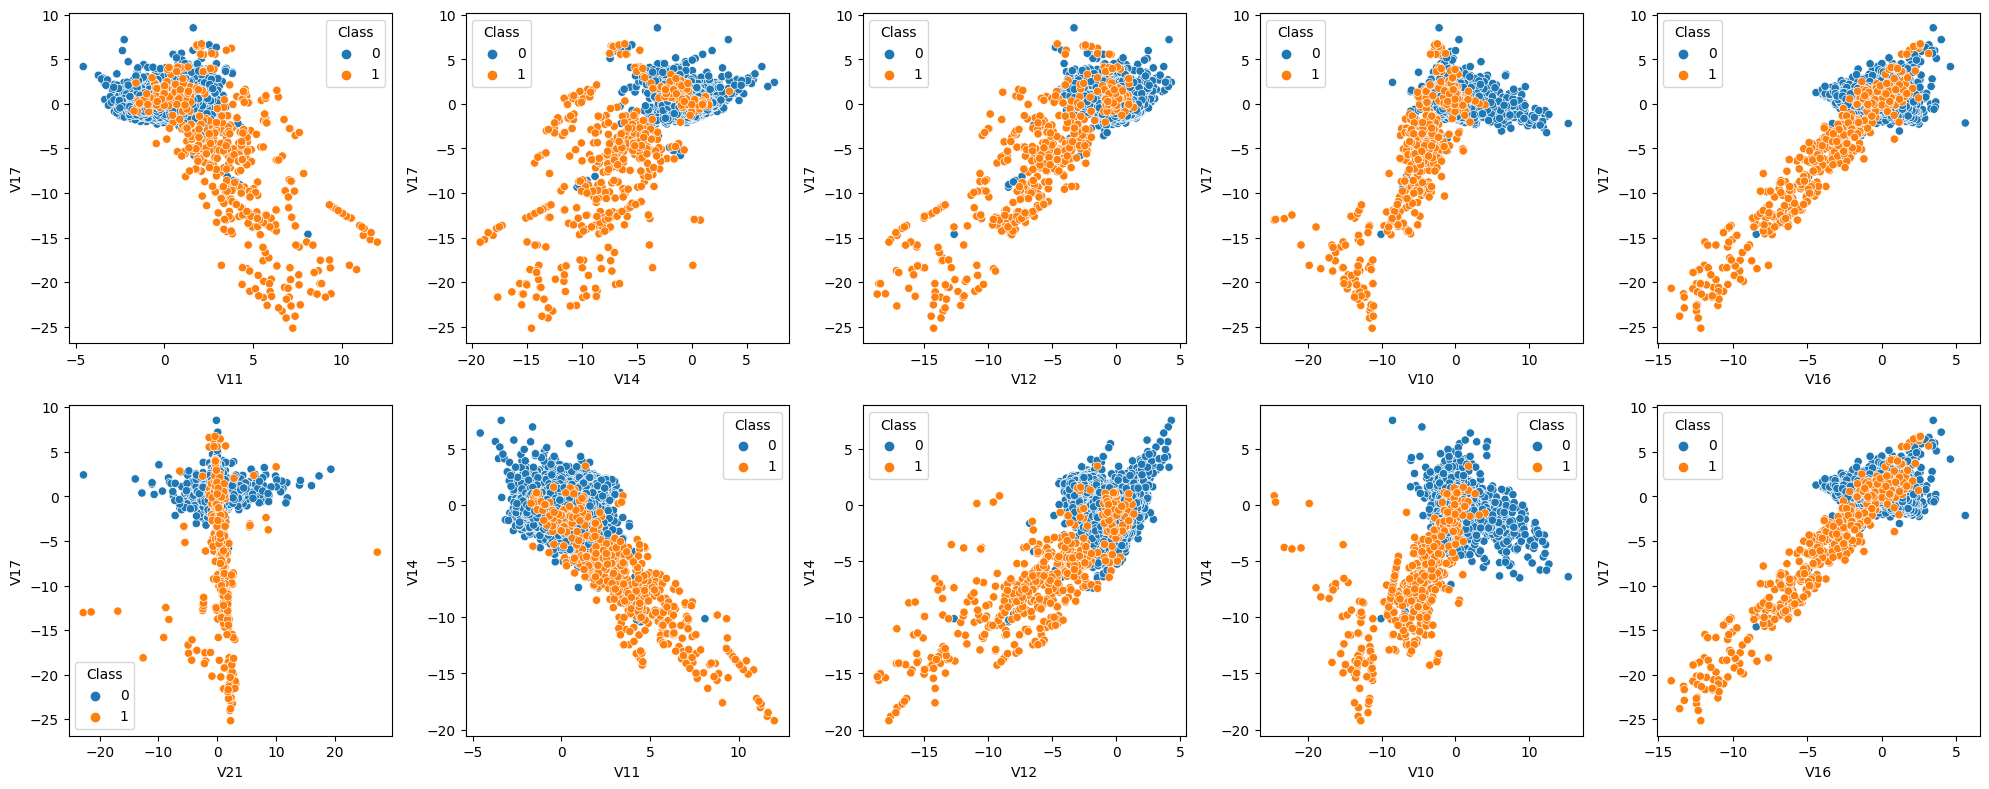

In [34]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

sns.scatterplot(data = df_resampled, x='V11', y='V17', hue='Class', ax=axs[0, 0])
sns.scatterplot(data = df_resampled, x='V14', y='V17', hue='Class', ax=axs[0, 1])
sns.scatterplot(data = df_resampled, x='V12', y='V17', hue='Class', ax=axs[0, 2])
sns.scatterplot(data = df_resampled, x='V10', y='V17', hue='Class', ax=axs[0, 3])
sns.scatterplot(data = df_resampled, x='V16', y='V17', hue='Class', ax=axs[0, 4])
sns.scatterplot(data = df_resampled, x='V21', y='V17', hue='Class', ax=axs[1, 0])
sns.scatterplot(data = df_resampled, x='V11', y='V14', hue='Class', ax=axs[1, 1])
sns.scatterplot(data = df_resampled, x='V12', y='V14', hue='Class', ax=axs[1, 2])
sns.scatterplot(data = df_resampled, x='V10', y='V14', hue='Class', ax=axs[1, 3])
sns.scatterplot(data = df_resampled, x='V16', y='V17', hue='Class', ax=axs[1, 4])


plt.tight_layout()
plt.show()

### Initial Exploration of Models Performance Using All Features

##### The LazyClassifier :

The LazyClassifier is a tool from the Python library lazypredict that provides a quick and easy way to train and compare multiple classification models without the need to write extensive code. It allows you to benchmark the performance of various classifiers with default hyperparameters, helping you to quickly identify which models might work best for your dataset.

##### Key Features of LazyClassifier : 
- Ease of Use: Requires minimal code to train multiple models.
- Quick Comparison: Provides a summary of model performance metrics, such as accuracy, F1 score, and ROC AUC.
- Time-Saving: Helps in the initial phase of model selection by automating the training and evaluation process for many models at once.

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_resampled.iloc[:,:-1], df_resampled[['Class']], test_size=0.2, random_state=42)
x_test

,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18,V1,V9,V5,V2,V6,V21
204263,0.308277,-1.022825,0.648927,-0.993733,0.900703,0.268844,0.034800,1.041956,-0.979701,0.858399,-1.092455,0.389927,-0.120086,1.210585,-0.057135,-0.208268
202699,0.709510,-0.198007,0.345637,-0.736855,-1.115449,1.055190,0.403534,-0.395109,0.144376,-1.094281,-0.719922,0.131708,0.102199,-0.457426,1.371500,0.536606
1710,-0.770251,0.352392,0.357152,0.528656,0.673972,1.881120,0.617262,0.864480,2.040716,0.358640,-0.492490,-1.750666,0.501345,1.237463,0.190603,-0.106551
274015,-0.214138,0.350704,-0.317729,0.748656,-0.001286,-0.572289,0.537400,-1.172925,-0.739426,-0.636369,-1.397841,0.813071,-0.204263,1.674360,-1.289650,-0.353934
145679,-0.013287,0.532558,-0.232027,-0.001551,-1.310984,-1.037624,0.782680,-0.281322,-0.067144,-0.393633,-0.386528,-0.835813,3.937677,0.342149,3.461838,0.120536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251719,0.865900,-1.106062,1.148742,-0.474601,0.026729,-1.808840,-0.371673,1.369668,0.098975,-0.546955,1.822239,0.412266,1.092783,-0.272382,1.414984,-0.002397
195787,1.368071,-0.405926,1.032660,-0.824787,-0.315799,-1.442462,0.767939,0.926129,1.011203,0.779904,-0.975272,-1.394985,0.873112,2.154909,-0.380611,0.185157
74272,-0.875251,0.457912,0.537834,0.791068,0.877484,0.473908,-0.056860,0.832897,2.154706,-0.207731,1.132849,-0.964291,0.363442,0.480281,0.660060,-0.209666
163551,0.799720,-1.668033,-0.894494,-0.802141,2.397709,0.006146,-0.366259,0.257201,-2.287319,0.508220,-0.922923,-1.013726,0.095254,0.336349,-0.027461,0.322518


In [40]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_resampled.iloc[:,:-1], df_resampled[['Class']], test_size=0.2, random_state=42)

# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [10:03<00:05,  5.42s/it] 

[LightGBM] [Info] Number of positive: 405, number of negative: 22733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 23138, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017504 -> initscore=-4.027686
[LightGBM] [Info] Start training from score -4.027686


100%|██████████| 29/29 [10:03<00:00, 20.82s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,1.00,0.93,0.93,1.00,0.07
DecisionTreeClassifier,0.99,0.92,0.92,0.99,1.41
QuadraticDiscriminantAnalysis,0.97,0.92,0.92,0.98,0.07
XGBClassifier,1.00,0.92,0.92,1.00,0.40
BaggingClassifier,1.00,0.92,0.92,1.00,8.69
GaussianNB,0.98,0.92,0.92,0.98,0.05
SGDClassifier,1.00,0.91,0.91,1.00,0.09
RandomForestClassifier,1.00,0.91,0.91,1.00,32.47
KNeighborsClassifier,1.00,0.91,0.91,1.00,0.59


In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)


parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

search = grid_search.fit(x_train, y_train)
print("The best hyperparameters are ",search.best_params_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
The best hyperparameters are  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 180}


In [92]:
from sklearn.metrics import classification_report, confusion_matrix

xgb_classifier=XGBClassifier(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='logloss')

xgb_classifier.fit(x_train, y_train)

prediction = xgb_classifier.predict(x_test)

# Print classification report on the test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, prediction))

print("\nConfusion matrix on Test Set:")
print(confusion_matrix(y_test, prediction))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5698
           1       0.96      0.82      0.88        87

    accuracy                           1.00      5785
   macro avg       0.98      0.91      0.94      5785
weighted avg       1.00      1.00      1.00      5785


Confusion matrix on Test Set:
[[5695    3]
 [  16   71]]


Threshold Optimization: Fine-tuning the threshold for probability predictions significantly enhanced the model's sensitivity in detecting fraudulent activities, reducing false negatives and improving overall accuracy.

In [93]:
# Predict probabilities for the test set
y_pred_proba = xgb_classifier.predict_proba(x_test)[:, 1]

threshold = 0.1

# Classify instances based on the new threshold
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_adjusted))

print("\nConfusion matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_adjusted))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5698
           1       0.86      0.87      0.87        87

    accuracy                           1.00      5785
   macro avg       0.93      0.94      0.93      5785
weighted avg       1.00      1.00      1.00      5785


Confusion matrix on Test Set:
[[5686   12]
 [  11   76]]


Future Directions: Further enhancements could involve exploring advanced feature engineering techniques, integrating additional data sources, or deploying the model in a real-time environment to continuously improve fraud detection capabilities.